# Set Axis Range When Plotting a Map

- https://docs.sunpy.org/en/stable/generated/gallery/plotting/xy_lims.html

In this example we are going to look at how to set the axes
range using Matplotlib's ``set_xlim`` and ``set_ylim`` when plotting a
Map with WCSAxes.

In [ ]:
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.data.sample
import sunpy.map

Lets start by creating a Map from the sample data.

In [ ]:
aia_map = sunpy.map.Map(sunpy.data.sample.AIA_171_IMAGE)

Now lets say for example we are only interested in plotting a certain region
of this Map. One way this could be done is to create a submap over the region
of interest and then plotting that. Another useful way is to set the axes
range over which to plot using Matplotlib's
`matplotlib.axes.Axes.set_xlim` and `matplotlib.axes.Axes.set_ylim` functionality.
The axes that Matplotlib uses is in pixel coordinates (e.g. of image data array)
rather than world coordinates (e.g. in arcsecs) so we need to define our limits that
are passed to `matplotlib.axes.Axes.set_xlim`, `matplotlib.axes.Axes.set_ylim` to pixel coordinates.
We can define our limits we want to use in world coordinates and then work out what pixel
coordinates these correspond to.
Lets choose x-limits and y-limits in arcsecs that we are interested in.



In [ ]:
xlims_world = [500, 1100]*u.arcsec
ylims_world = [-800, 0]*u.arcsec

We can then convert these into a `astropy.coordinates.SkyCoord` which can be passed to `GenericMap.wcs.world_to_pixel` to determine the corresponding pixel coordinates.

In [ ]:
world_coords = SkyCoord(Tx=xlims_world, Ty=ylims_world, frame=aia_map.coordinate_frame)
world_coords

<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>): (Tx, Ty) in arcsec
    [( 500., -800.), (1100.,    0.)]>

In [ ]:
pixel_coords_x, pixel_coords_y = aia_map.wcs.world_to_pixel(world_coords)

In [ ]:
pixel_coords_x

array([719.05779338, 967.96372033])

In [ ]:
pixel_coords_y

array([178.47655131, 512.02928467])

We can now plot this Map and then use ``pixel_coords_x`` and ``pixel_coords_y`` to set
the limits on the axes.

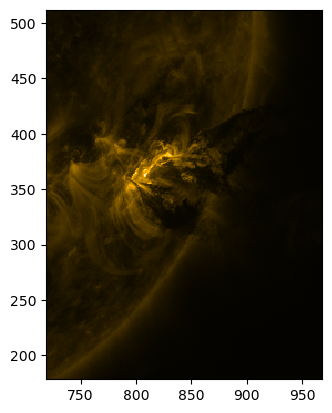

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(aia_map.data, **aia_map.plot_settings)
ax.set_xlim(pixel_coords_x)
ax.set_ylim(pixel_coords_y)

plt.show()

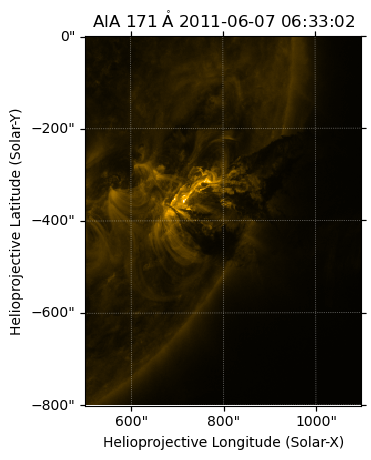

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia_map)
aia_map.plot(axes=ax)
ax.set_xlim(pixel_coords_x)
ax.set_ylim(pixel_coords_y)

plt.show()